In [48]:
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import requests

In [20]:
path = 'adonis.jpg'

%timeit load_img(path, target_size = (360, 420)) 

21.4 ms ± 270 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
train_image = load_img(path, target_size = (100, 420))
%timeit img_to_array(train_image)
%timeit cv2.imread(path)
%timeit plt.imread(path)

107 µs ± 1.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
23.2 ms ± 2.09 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
29.1 ms ± 234 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
img = plt.imread(path)
%timeit cv2.resize(img, (360, 420), interpolation=cv2.INTER_AREA)

6.17 ms ± 156 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


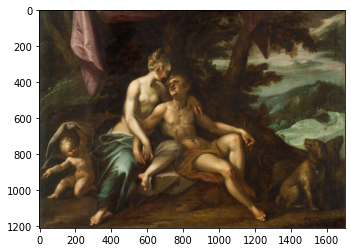

In [26]:
plt.imshow(img);

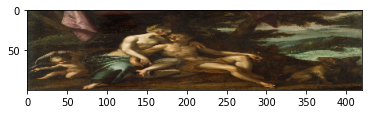

In [29]:
plt.imshow(train_image);

In [46]:
from vincentvanbot.data import get_data_locally

df = get_data_locally(nrows=100_000)
df.head()

,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,URL,FORM,TYPE,SCHOOL,TIMEFRAME
0,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Venus and Adonis,1574-88,"Oil on canvas, 68 x 95 cm","Fogg Art Museum, Harvard University, Cambridge",https://www.wga.hu/art/a/aachen/adonis.jpg,painting,mythological,German,1601-1650
1,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Allegory,1598,"Oil on copper, 56 x 47 cm","Alte Pinakothek, Munich",https://www.wga.hu/art/a/aachen/allegory.jpg,painting,mythological,German,1601-1650
2,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Allegory of Peace, Art and Abundance",1602,"Oil on canvas, 197 x 142 cm","The Hermitage, St. Petersburg",https://www.wga.hu/art/a/aachen/allegorz.jpg,painting,mythological,German,1601-1650
3,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Jupiter, Antiope and Cupid",1595-98,"Oil on copper, 31 x 21 cm","Kunsthistorisches Museum, Vienna",https://www.wga.hu/art/a/aachen/antiope.jpg,painting,mythological,German,1601-1650
4,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Pallas Athena, Venus and Juno",1593,"Oil on canvas, 54 x 67 cm","Museum of Fine Arts, Boston",https://www.wga.hu/art/a/aachen/athena.jpg,painting,mythological,German,1601-1650


In [59]:
!pwd

/home/sevebot/code/seve-26/vincentvanbot/notebooks


In [64]:
import os

images_path = os.path.join('..','raw_data','images')
os.mkdir(images_path)

def download_image(row):
    response = requests.get(row['URL'])
    f = open(os.path.join(images_path,f'{row.name}.jpg'), 'wb')
    f.write(response.content)
    f.close()
    return row

In [65]:
df.head(3).apply(download_image,axis=1)

,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,URL,FORM,TYPE,SCHOOL,TIMEFRAME
0,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Venus and Adonis,1574-88,"Oil on canvas, 68 x 95 cm","Fogg Art Museum, Harvard University, Cambridge",https://www.wga.hu/art/a/aachen/adonis.jpg,painting,mythological,German,1601-1650
1,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Allegory,1598,"Oil on copper, 56 x 47 cm","Alte Pinakothek, Munich",https://www.wga.hu/art/a/aachen/allegory.jpg,painting,mythological,German,1601-1650
2,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Allegory of Peace, Art and Abundance",1602,"Oil on canvas, 197 x 142 cm","The Hermitage, St. Petersburg",https://www.wga.hu/art/a/aachen/allegorz.jpg,painting,mythological,German,1601-1650


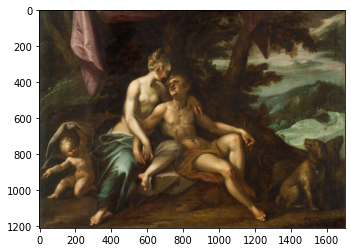

In [45]:
img = plt.imread('1.jpg')
plt.imshow(img)